# TASK - 2

## Project : Customer Segmentation Using K-Means Clustering Based on Purchase History

## Project summary : 
This project involves using the K-Means clustering algorithm to segment customers of a retail store based on their purchase history. The segmentation will help in understanding different customer groups and tailoring marketing strategies to better meet their needs.

## Project goals :
- Implement K-Means clustering on customer purchase history data.
- Analyze and interpret the resulting customer segments.
- Provide actionable insights for targeted marketing and customer relationship management.

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## 2. Explore the Data

In [2]:
os.chdir("C:\\Users\\tanis\\Downloads\\PRODIGY_ML_02")

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data1 = data['Spending Score (1-100)'] > 50
df_score = data[data1]
df_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.shape

(200, 5)

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
19,20,Female,35,23,98
146,147,Male,48,77,36
198,199,Male,32,137,18
102,103,Male,67,62,59
73,74,Female,60,50,56


In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.duplicated().sum()

In [12]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


## 3. EDA (Exploratory data analysis)

#### 1. Distribution of Annual Income

C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


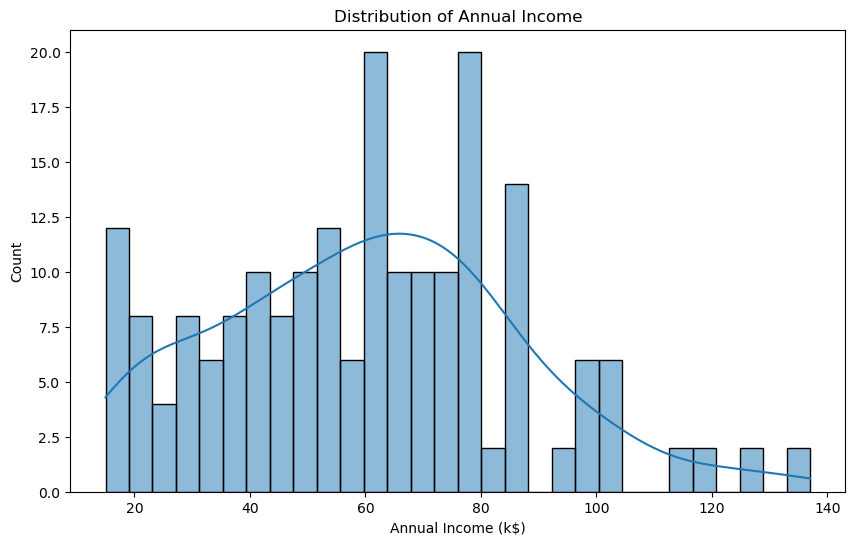

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], bins=30, kde=True)
plt.xlabel('Annual Income (k$)')
plt.title('Distribution of Annual Income')
plt.show()

##### Conclusion : 
The histogram illustrates the distribution of annual incomes among customers in the mall dataset. The distribution appears to be roughly normal, with the majority of customers having an annual income between $40k and $80k. There is a notable presence of both lower and higher income groups, indicating a diverse customer base in terms of purchasing power.

#### 2. Distribution of Spending Score

C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


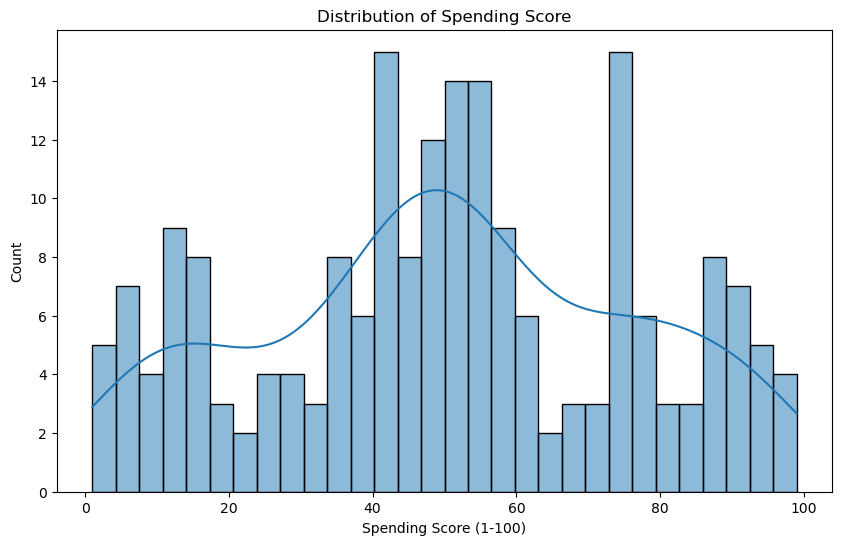

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], bins=30, kde=True)
plt.xlabel('Spending Score (1-100)')
plt.title('Distribution of Spending Score')
plt.show()

##### Conclusion:
The histogram of the spending scores reveals that customer spending behavior is spread across the entire range of scores, from 1 to 100. There are noticeable peaks around scores of 40 and 70, suggesting that a significant portion of customers fall into moderate and high spending categories. This distribution indicates a mix of conservative spenders and high spenders within the customer base.

#### 3. Annual Income vs Spending Score

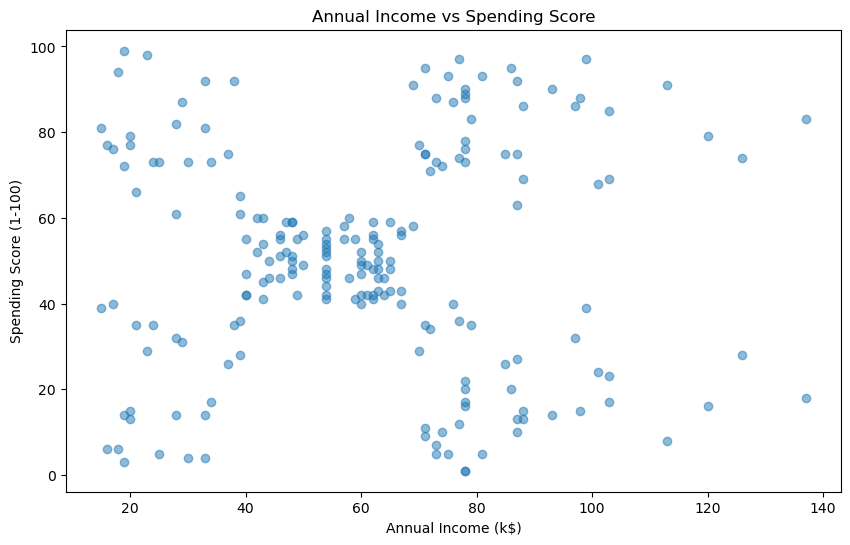

In [15]:
#3. Scatter Plot: Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], alpha=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

##### Conclusion : 
The scatter plot of annual income versus spending score reveals distinct customer segments. Customers with similar incomes exhibit a wide range of spending behaviors, from low to high spending scores. This indicates that income alone does not predict spending patterns, highlighting the need for more nuanced customer segmentation for effective marketing strategies.

#### 4. Pair Plot of Annual Income, Spending Score, and Age

C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


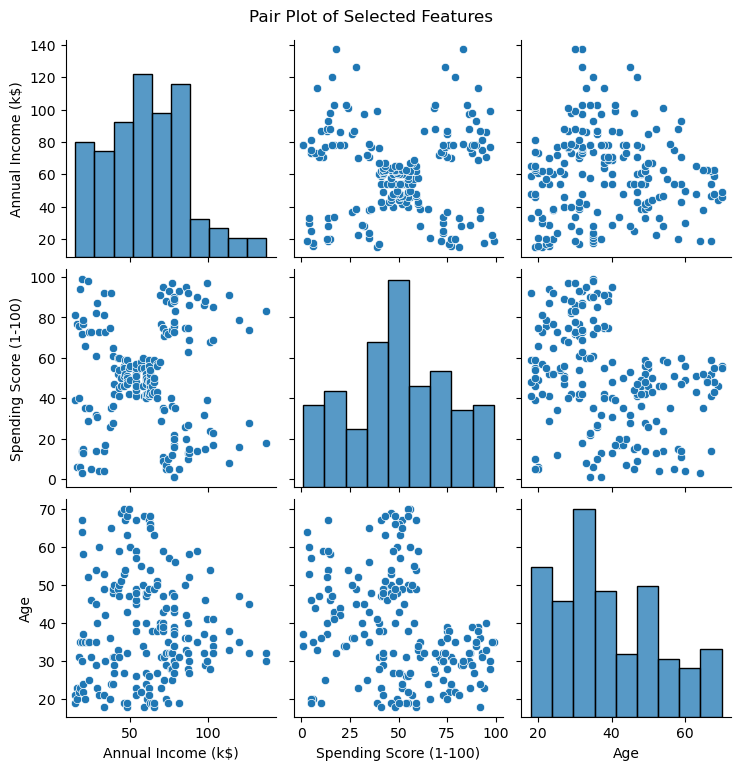

In [16]:
sns.pairplot(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


##### Conclusion :
The pair plot provides a comprehensive view of the relationships between annual income, spending score, and age. It highlights that there is no clear linear relationship between age and spending score, whereas some clusters can be observed between annual income and spending score. This indicates that both age and income independently influence spending behavior, suggesting a multifaceted approach to customer segmentation.

#### 5. Spending Score by Age Group

C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


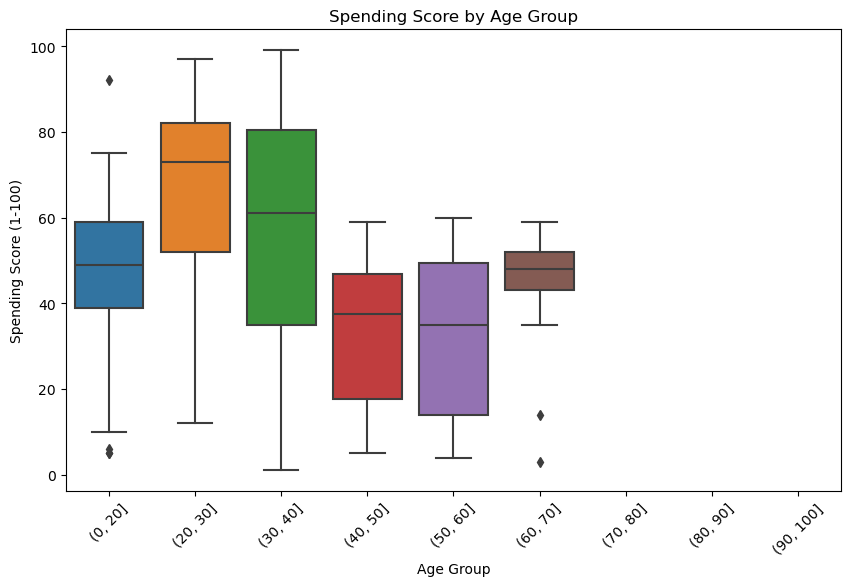

In [18]:
data['Age Group'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Spending Score (1-100)', data=data)
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Age Group')
plt.xticks(rotation=45)
plt.show()


 ##### Conclusion :
 The box plot reveals variations in spending scores across different age groups. Younger age groups, particularly those under 30, tend to have a wider range and higher median spending scores compared to older age groups. This suggests that younger customers are more diverse in their spending habits and tend to spend more than older customers, highlighting the importance of targeting marketing efforts towards younger demographics.

#### 6. Spending Score (51-100): Age Distribution

Text(0.5, 1.0, 'Spending Score(51-100) : Age Distribution')

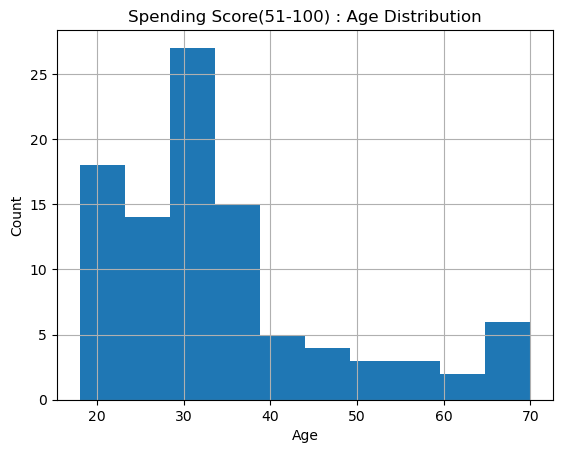

In [19]:
df_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51-100) : Age Distribution')

##### Conclusion:
The histogram shows the age distribution of customers with spending scores between 51 and 100. The plot indicates that younger customers, especially those in their 20s and 30s, are more likely to have higher spending scores. This suggests that younger age groups tend to be more active spenders in the mall, which can be useful for targeting promotional efforts and understanding customer demographics.

#### 7. Gender Distribution for Different Spending Scores

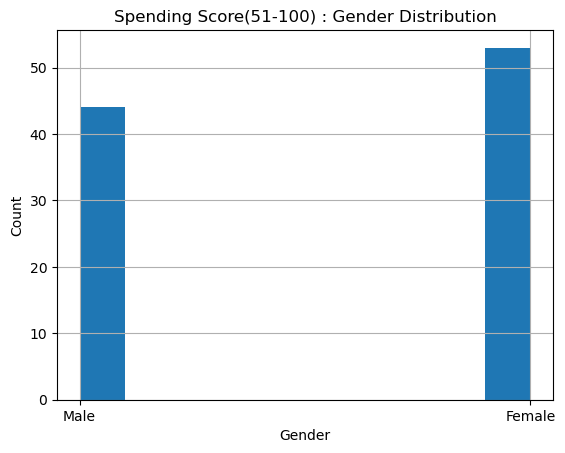

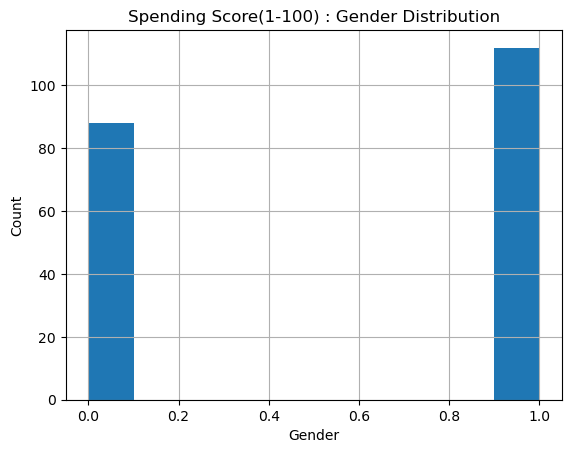

In [21]:
df_score['Gender'].hist()
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Spending Score(51-100) : Gender Distribution')
plt.show()

data['Gender'].hist()
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Spending Score(1-100) : Gender Distribution')
plt.show()

##### Conclusion :
The first histogram illustrates the gender distribution of customers with spending scores between 51 and 100, while the second histogram shows the gender distribution of all customers regardless of their spending scores. In both distributions, there is a relatively balanced representation of male and female customers. However, the high spending group (scores 51-100) shows a slight skew towards female customers, indicating that females might be more active spenders in the higher spending category.

## 4. KMeans Clustering

####  Introduction to K-Means Clustering
K-Means clustering is an unsupervised machine learning algorithm that is used to partition a dataset into K distinct, non-overlapping subgroups (clusters). The algorithm aims to minimize the variance within each cluster, making each cluster as homogeneous as possible.

####  1. Load the dataset and preprocess the data:

In [24]:
# Select relevant features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [25]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### 2. Determine the optimal number of clusters using the elbow method:

C:\Users\tanis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tanis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tanis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tanis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

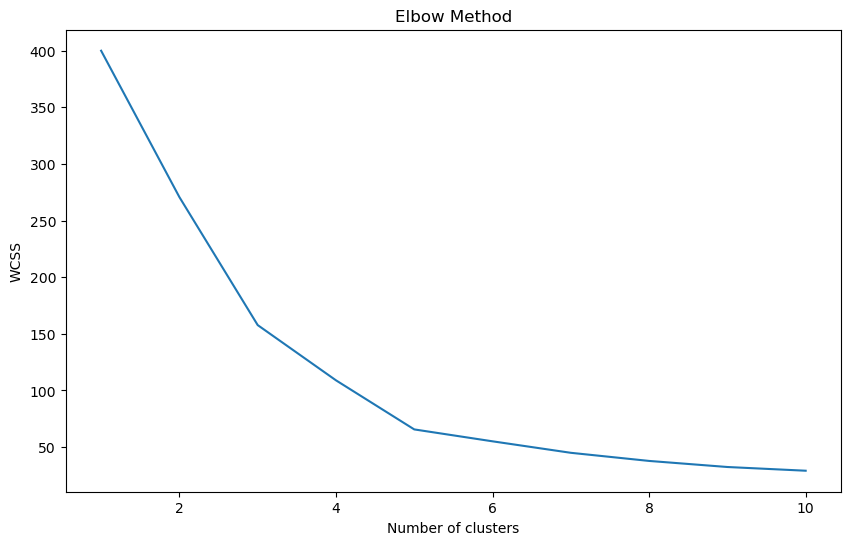

In [26]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### 3. Apply K-Means clustering with the optimal number of clusters:

In [27]:
# Apply K-Means clustering
optimal_clusters = 5  # Assume the elbow method suggested 5 clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

C:\Users\tanis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
# Add the cluster labels to the original dataframe
data['Cluster'] = clusters

#### 4. Visualize the clusters:

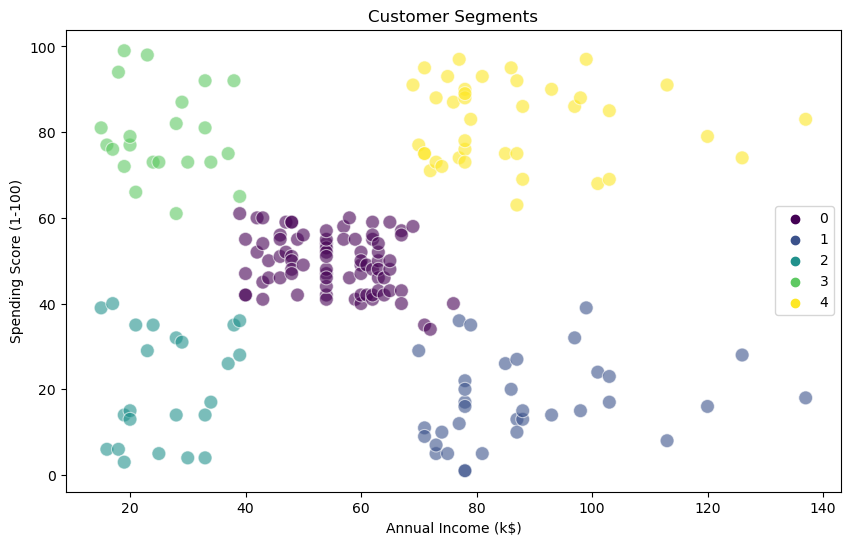

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### 5. Analyze the clusters:

In [30]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
cluster_summary['Cluster'] = range(optimal_clusters)
print(cluster_summary)


   Annual Income (k$)  Spending Score (1-100)  Cluster
0           55.296296               49.518519        0
1           88.200000               17.114286        1
2           26.304348               20.913043        2
3           25.727273               79.363636        3
4           86.538462               82.128205        4


### Conclusion :
By applying the K-Means clustering algorithm to the customer purchase history, we can identify distinct customer segments with similar purchasing behaviors. These segments provide valuable insights for creating targeted marketing campaigns, improving customer satisfaction, and increasing sales.